⭐ 3️⃣ ARMA (AR + MA)

Model:
📌 Example:
Predict using:

Past prices (AR)

Past shocks (MA)

When to use:
Data is stationary, no trend or seasonality.


Testing Models

Testing ARMA(1, 0, 2) ...
Order=(1, 0, 2), RMSE=0.046991, MAPE=949439777669.064331
----------------------------------
Testing ARMA(1, 0, 1) ...
Order=(1, 0, 1), RMSE=0.046973, MAPE=952822976448.857788
----------------------------------
Testing ARMA(2, 0, 1) ...
Order=(2, 0, 1), RMSE=0.046895, MAPE=982394456654.287354
----------------------------------
Testing ARMA(1, 0, 1) ...
Order=(1, 0, 1), RMSE=0.046973, MAPE=952822976448.857788
----------------------------------

BEST ARMA MODEL (FULL DATA)
Order : (2, 0, 1)
RMSE  : 0.046895
MAPE  : 982394456654.287354


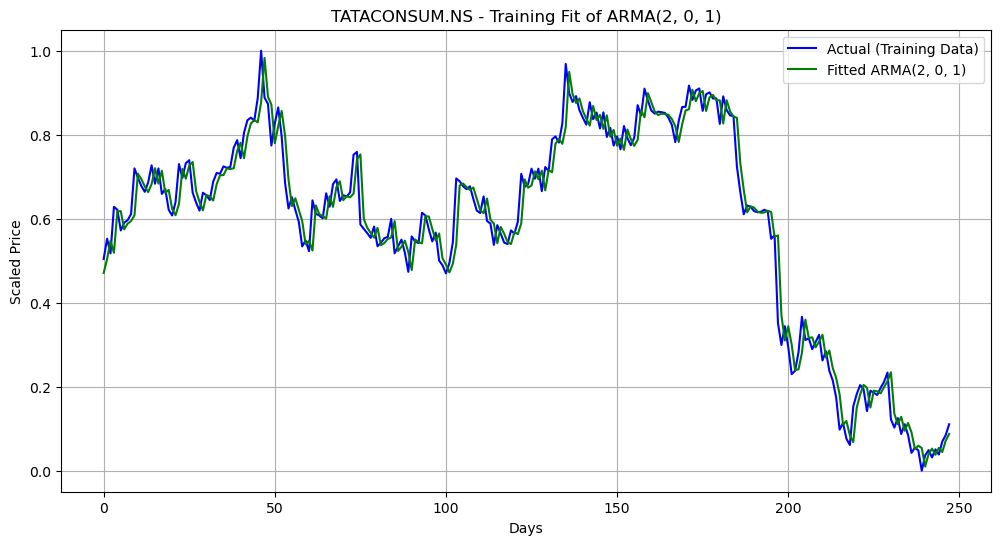

In [10]:
# ========================================================
# 0️⃣ IMPORT
# ========================================================

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA

# ========================================================
# Function to compute RMSE + MAPE
# ========================================================

def rmsemape(actual, predicted):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = mean_absolute_percentage_error(actual, predicted)
    print(f"RMSE : {rmse:.6f}")
    print(f"MAPE : {mape:.6f}")
    print("------------------------------")

# ========================================================
# 1️⃣ DEFINE ARMA ORDERS
# ========================================================

orders = [(1,0,2), (1,0,1), (2,0,1), (1,0,1)]

results = []

print("\n==============")
print("Testing Models")
print("==============\n")

# ========================================================
# 2️⃣ LOOP THROUGH ARMA MODELS
# ========================================================

for order in orders:
    
    print(f"Testing ARMA{order} ...")
    
    try:
        model = ARIMA(data1, order=order)
        model_fit = model.fit()

        # Predict over entire dataset
        y_pred = model_fit.predict(0, len(data1)-1)

        # Calculate RMSE + MAPE
        rmse = np.sqrt(mean_squared_error(data1, y_pred))
        mape = mean_absolute_percentage_error(data1, y_pred)

        print(f"Order={order}, RMSE={rmse:.6f}, MAPE={mape:.6f}")
        print("----------------------------------")

        results.append({
            'order': order,
            'rmse': rmse,
            'mape': mape
        })

    except Exception as e:
        print(f"Model failed for order {order}: {e}")
        print("----------------------------------")


# ========================================================
# 3️⃣ SELECT BEST MODEL
# ========================================================

best_model = min(results, key=lambda x: x['rmse'])

print("\n========================")
print("BEST ARMA MODEL (FULL DATA)")
print("========================")
print(f"Order : {best_model['order']}")
print(f"RMSE  : {best_model['rmse']:.6f}")
print(f"MAPE  : {best_model['mape']:.6f}")


# ========================================================
# 4️⃣ PLOT TRAINING MODEL RESULTS (ACTUAL vs FITTED)
# ========================================================

import matplotlib.pyplot as plt

# Refit best model
best_order = best_model["order"]

model = ARIMA(data1, order=best_order)
model_fit = model.fit()

# Predict full dataset
fitted = model_fit.predict(0, len(data1)-1)

# Convert to numpy array for plotting
actual = np.array(data1).reshape(-1)
predicted = np.array(fitted).reshape(-1)

plt.figure(figsize=(12,6))
plt.plot(actual, label="Actual (Training Data)", color="blue")
plt.plot(predicted, label=f"Fitted ARMA{best_order}", color="green")

plt.title(f"TATACONSUM.NS - Training Fit of ARMA{best_order}")
plt.xlabel("Days")
plt.ylabel("Scaled Price")
plt.legend()
plt.grid()
plt.show()


# AutoReg 30-day future forecast module


📈 NEXT 30 DAYS FORECAST (SCALED VALUES)

Day +1: 0.1122
Day +2: 0.1157
Day +3: 0.1195
Day +4: 0.1232
Day +5: 0.1269
Day +6: 0.1306
Day +7: 0.1342
Day +8: 0.1378
Day +9: 0.1414
Day +10: 0.1449
Day +11: 0.1484
Day +12: 0.1518
Day +13: 0.1552
Day +14: 0.1586
Day +15: 0.1619
Day +16: 0.1652
Day +17: 0.1685
Day +18: 0.1717
Day +19: 0.1749
Day +20: 0.1781
Day +21: 0.1812
Day +22: 0.1843
Day +23: 0.1874
Day +24: 0.1904
Day +25: 0.1934
Day +26: 0.1964
Day +27: 0.1993
Day +28: 0.2022
Day +29: 0.2051
Day +30: 0.2079


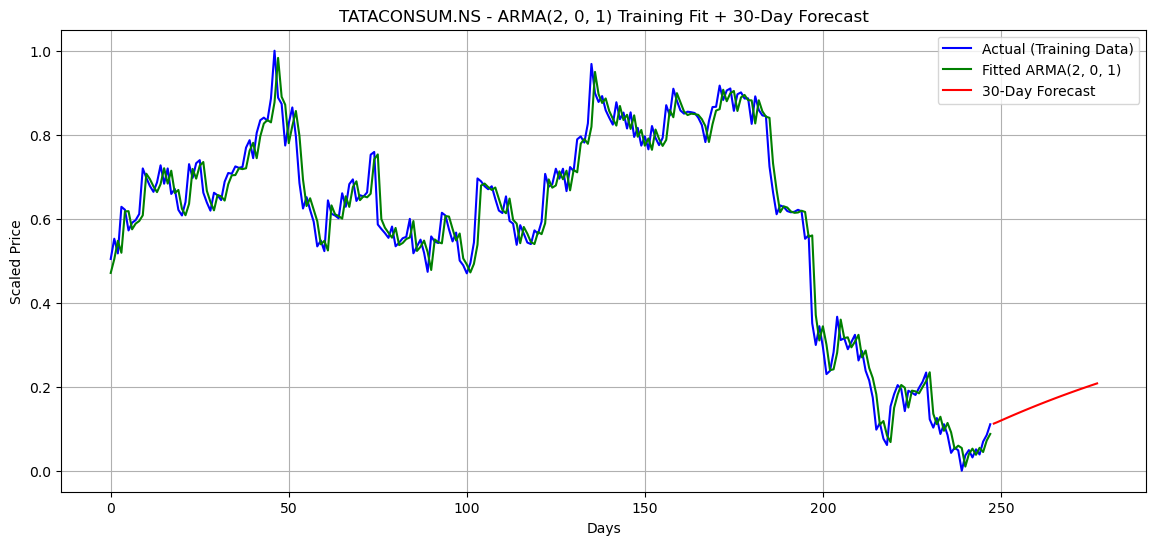

In [11]:
# ========================================================
# 5️⃣ FORECAST NEXT 30 DAYS
# ========================================================

future_steps = 30
best_order = best_model["order"]

# Refit model on full data
model = ARIMA(data1, order=best_order)
model_fit = model.fit()

# Forecast future values
future_pred_scaled = model_fit.predict(
    start=len(data1),
    end=len(data1) + future_steps - 1
)

future_pred_scaled = np.array(future_pred_scaled)

print("\n============================")
print("📈 NEXT 30 DAYS FORECAST (SCALED VALUES)")
print("============================\n")
for i, val in enumerate(future_pred_scaled):
    print(f"Day +{i+1}: {val:.4f}")

# ========================================================
# 6️⃣ PLOT FULL TRAINING FIT + 15-DAY FORECAST
# ========================================================

plt.figure(figsize=(14,6))

# Actual full series
plt.plot(data1, label="Actual (Training Data)", color="blue")

# Fitted values
fitted = model_fit.predict(0, len(data1)-1)
plt.plot(fitted, label=f"Fitted ARMA{best_order}", color="green")

# Forecast (extend timeline)
forecast_index = range(len(data1), len(data1) + future_steps)
plt.plot(forecast_index, future_pred_scaled, label="30-Day Forecast", color="red")

plt.title(f"TATACONSUM.NS - ARMA{best_order} Training Fit + 30-Day Forecast")
plt.xlabel("Days")
plt.ylabel("Scaled Price")
plt.legend()
plt.grid()
plt.show()

